In [1]:
#importing important libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [2]:
# Adding weights to the ICM graph
def assign_weights(graph):
    for u,v in graph.edges():
        weight = 1/(graph.degree(v))
        graph[u][v]['weight'] = weight
    return graph

In [3]:
# Function to generate the graphs with random weights
def sample_w_icm(g, num_of_networks):
    gen_nets = []
    for n in range(num_of_networks):
        h = nx.Graph()
        h.add_nodes_from(g.nodes())
        for u,v in g.edges():
            if random.random() < g[u][v]['weight']:
                h.add_edge(u,v)
        gen_nets.append(h)
    return gen_nets

In [4]:
def average_coverage(Set, list_of_graphs):
    list_of_nodes = list(Set)
    total_size = 0
    average_coverage = 0
    for graph in list_of_graphs:
        set_of_nodes_covered = set()
        if (len(list_of_nodes) == 0):
            average_coverage = 0
        else:
            for item in list_of_nodes:
                coverage_in_a_single_graph = nx.node_connected_component(graph, item)
                set_of_nodes_covered = set_of_nodes_covered.union(coverage_in_a_single_graph)
        size_of_coverage_in_the_graph = len(set_of_nodes_covered)
        total_size += size_of_coverage_in_the_graph
    average_coverage = total_size/len(list_of_graphs)
    
    return average_coverage

In [5]:
# def coverage(Set, graph):
#     list_of_nodes = list(Set)   # Convert set to list because sets are immutable
#     set_of_nodes_covered = set()
#     for item in list_of_nodes:
#         coverage_in_a_single_graph = nx.node_connected_component(graph, item)
#         set_of_nodes_covered = set_of_nodes_covered.union(coverage_in_a_single_graph)
#     size_of_coverage_in_the_graph = len(set_of_nodes_covered)

#     return size_of_coverage_in_the_graph

In [6]:
def get_nodes(graph):
    y = []
    for i in range(len(graph.nodes)):
        y.append(i)
    return y

In [7]:
def greedy(graphList, k):
    S = set()
    list_of_nodes = get_nodes(graphList[0])
    gain = []
    while(len(S)) < k:
        list_of_marginal_gains = []
        for item in list_of_nodes:
            A = set()
            A.add(item)
            A = A | S
            marginal_gain = average_coverage(A, graphList) - average_coverage(S, graphList)
            list_of_marginal_gains.append(marginal_gain)
        index = list_of_marginal_gains.index(max(list_of_marginal_gains))
        gain.append(max(list_of_marginal_gains))
        S.add(list_of_nodes[index])
        list_of_nodes.pop(index)
    return S, gain

In [ ]:
# Working on the fairness data
g = pickle.load(open('networks/graph_spa_500_0.pickle','rb')) 

# Assigning weigths to the edges
graph = assign_weights(g)

# Create samples 
sampled_graphs = sample_w_icm(g, 10000)

# finding the coverage for each number of nodes
nodes_covered = []

for k in range(1, 31):
    cover = greedy(sampled_graphs, k)
    total_cover = sum(cover[1])
    nodes_covered.append(total_cover)
    print(f'Iter {k}')
# k = 30
# best_20 = greedy(sampled_graphs, k)

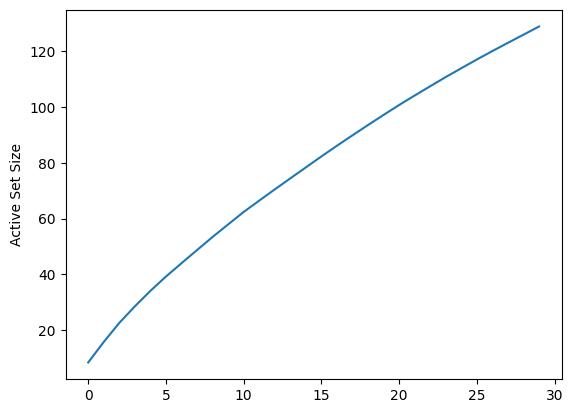

In [11]:
plt.plot(range(0, len(nodes_covered)), nodes_covered)
plt.ylabel("Active Set Size")
plt.show()

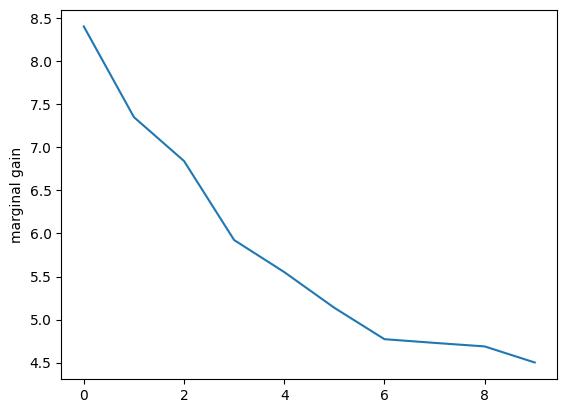

In [12]:
# Showing the diminishing return property
# For a 10 node seedset
k = 10
cover, gain = greedy(sampled_graphs, k)
plt.plot(range(0, len(gain)), gain)
plt.ylabel("marginal gain")
plt.show()
